In [1]:
import backtrader as bt
import backtrader.analyzers as btanalyzers
import matplotlib
from datetime import datetime

import yfinance as yf

class MACrossStrategy(bt.Strategy):
    
    def __init__(self):
        
        ma_fast = bt.ind.SMA(period=10)
        ma_slow = bt.ind.SMA(period=50)
        
        
        
        self.crossover = bt.ind.CrossOver(ma_fast, ma_slow)
        
    def next(self):
        if not self.position:
            if self.crossover >0:
                self.buy()
        elif self.crossover < 0:
            self.close()

In [2]:
class StochStrategy(bt.Strategy):
    
    def __init__(self):
        
        
        self.stoch = bt.ind.StochasticSlow(period=14, period_dfast=7,upperband=90,lowerband=10)
        
        
    # Long    
    def next(self):
        if not self.position:
            if self.stoch < 10:
                self.buy()
        elif self.stoch > 90:
            self.close()
      
    
    
#     # Short   
#     def next(self):
#         if not self.position:
#             if self.stoch > 90:
#                 self.sell()
#         elif self.stoch < 10:
#             self.close()

In [3]:
cerebro = bt.Cerebro()

In [4]:
data = bt.feeds.PandasData(dataname=yf.download('BTC-USD', '2022-2-10',interval='15m'))
cerebro.adddata(data)

[*********************100%***********************]  1 of 1 completed


In [5]:
cerebro.addstrategy(StochStrategy)

0

In [6]:
cerebro.broker.setcash(100)

In [7]:
# tf is this???
cerebro.addsizer(bt.sizers.PercentSizer, percents = 10)

In [8]:
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name = 'sharpe')
cerebro.addanalyzer(bt.analyzers.Transactions, _name = 'trans')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name = 'trades')

In [9]:
backtest = cerebro.run()

In [10]:
cerebro.broker.getvalue()

99.89091648918135

In [11]:
backtest[0].analyzers.sharpe.get_analysis()

OrderedDict([('sharperatio', None)])

In [12]:
backtest[0].analyzers.trans.get_analysis()

OrderedDict([(datetime.datetime(2022, 2, 10, 1, 0),
              [[0.0002265605419328163,
                44137.30859375,
                0,
                '',
                -9.99977255445595]]),
             (datetime.datetime(2022, 2, 10, 8, 0),
              [[-0.0002265605419328163,
                44082.80859375,
                0,
                '',
                9.987425004920611]]),
             (datetime.datetime(2022, 2, 10, 20, 30),
              [[0.00022601654245687854,
                44245.61328125,
                0,
                '',
                -10.00024053271227]]),
             (datetime.datetime(2022, 2, 11, 8, 30),
              [[-0.00022601654245687854,
                43497.18359375,
                0,
                '',
                9.831083042471437]]),
             (datetime.datetime(2022, 2, 11, 19, 30),
              [[0.00023469568460140228,
                42511.640625,
                0,
                '',
                -9.9772986000

In [13]:
backtest[0].analyzers.trades.get_analysis()

AutoOrderedDict([('total',
                  AutoOrderedDict([('total', 4), ('open', 0), ('closed', 4)])),
                 ('streak',
                  AutoOrderedDict([('won',
                                    AutoOrderedDict([('current', 1),
                                                     ('longest', 1)])),
                                   ('lost',
                                    AutoOrderedDict([('current', 0),
                                                     ('longest', 3)]))])),
                 ('pnl',
                  AutoOrderedDict([('gross',
                                    AutoOrderedDict([('total',
                                                      -0.10908351081865626),
                                                     ('average',
                                                      -0.027270877704664066)])),
                                   ('net',
                                    AutoOrderedDict([('total',
                               

<IPython.core.display.Javascript object>


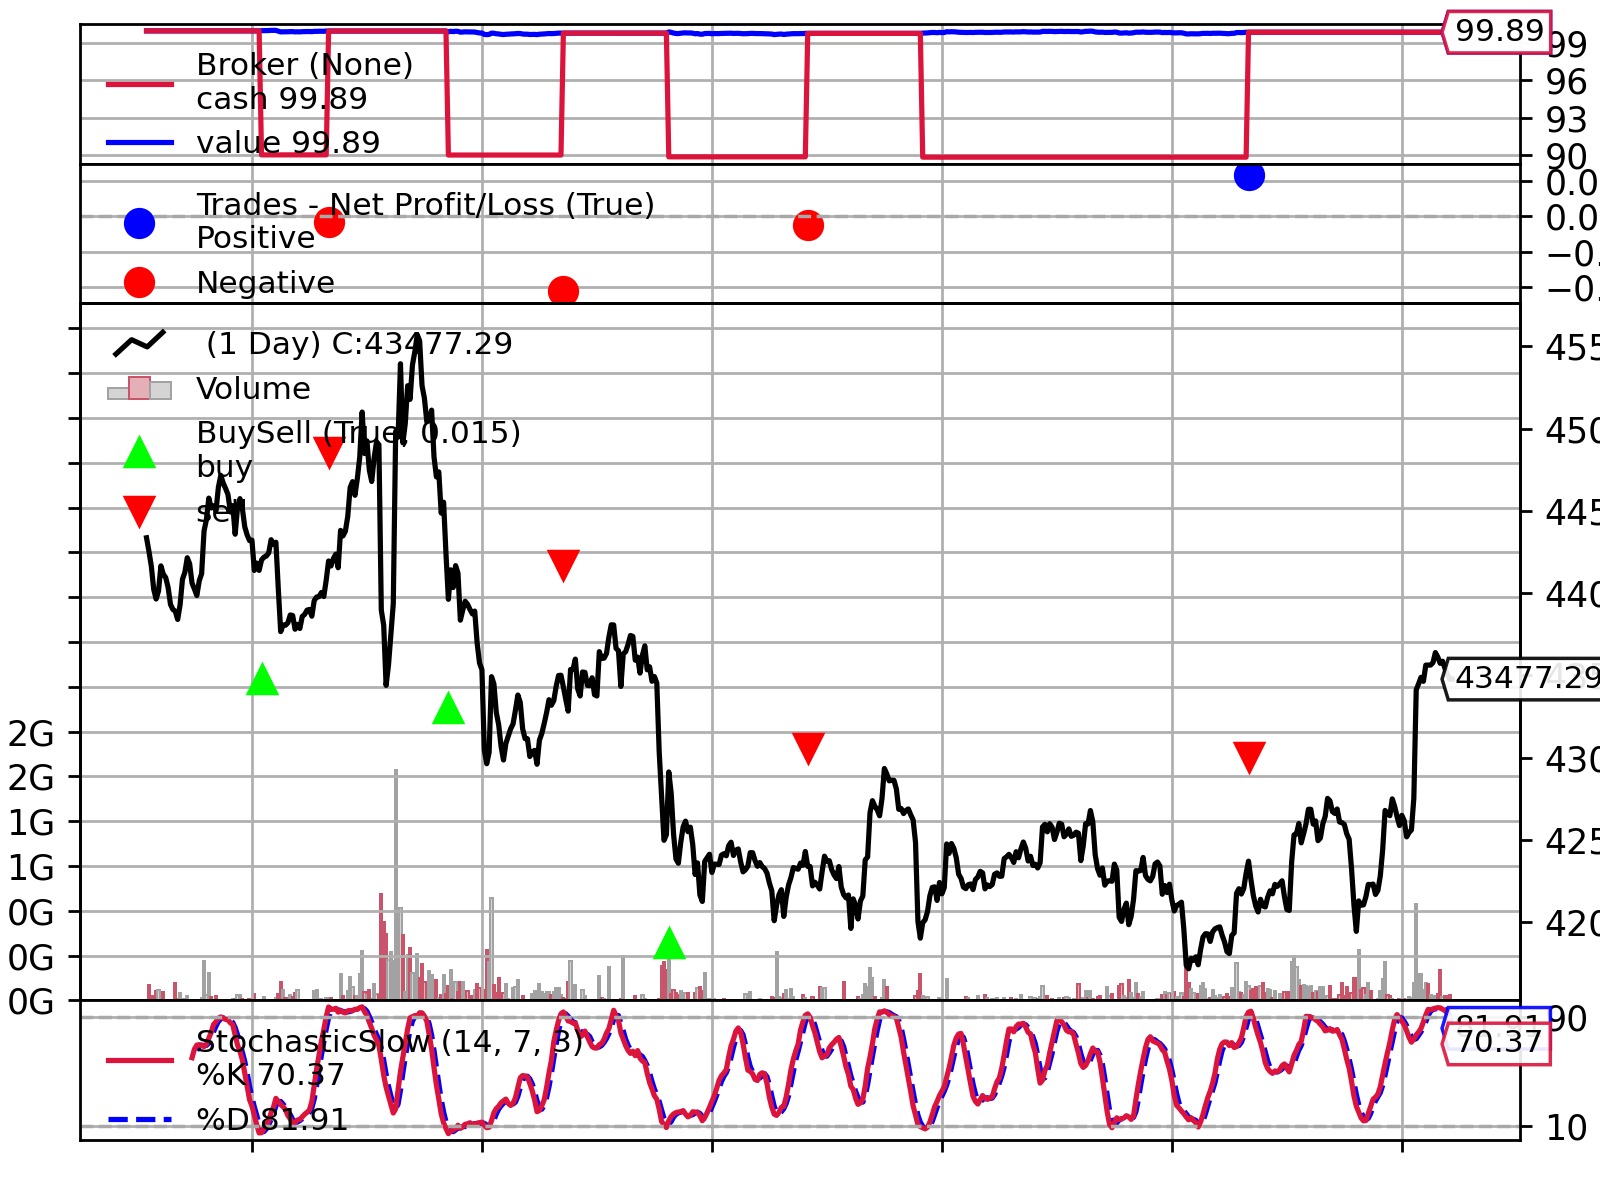

[[<Figure size 640x480 with 5 Axes>]]

In [14]:
cerebro.plot()